In [1]:
#e_damping.ipynb
#by Joe Hahn, jmh.datasciences@gmail.com, 25 August 2021.
#confirm that integral I(e_prime)=1

In [2]:
#prep plots
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
color_seq = plt.rcParams['axes.prop_cycle'].by_key()['color']
from matplotlib import rcParams
import numpy as np
import pandas as pd

In [3]:
#define integrand and integral I(ep)=integral of integrand from phi=0..Pi
def integrand(phi, ep):
    num = 1 - (4.0/3.0)*ep*np.cos(phi)
    den = 1 - ep*np.cos(phi)
    itg = (num/den)**2
    itg = itg/np.pi
    return itg
def I_ep(ep):
    from scipy.integrate import quad
    integral = quad(integrand, 0, np.pi, args=(ep))
    return integral[0]

In [4]:
#generate array of e_primes
e_primes = np.sort(np.append(np.linspace(0.5, 0.99, num=50), [np.sqrt(3)/2]))
e_primes

array([0.5      , 0.51     , 0.52     , 0.53     , 0.54     , 0.55     ,
       0.56     , 0.57     , 0.58     , 0.59     , 0.6      , 0.61     ,
       0.62     , 0.63     , 0.64     , 0.65     , 0.66     , 0.67     ,
       0.68     , 0.69     , 0.7      , 0.71     , 0.72     , 0.73     ,
       0.74     , 0.75     , 0.76     , 0.77     , 0.78     , 0.79     ,
       0.8      , 0.81     , 0.82     , 0.83     , 0.84     , 0.85     ,
       0.86     , 0.8660254, 0.87     , 0.88     , 0.89     , 0.9      ,
       0.91     , 0.92     , 0.93     , 0.94     , 0.95     , 0.96     ,
       0.97     , 0.98     , 0.99     ])

In [5]:
#compute I_ep for all e_primes
I_eps = []
for ep in e_primes:
    I_eps += [I_ep(ep)]
I_eps = np.array(I_eps)

('x = ', 0.8660254037844386)
('y = ', 0.8888888888889426)


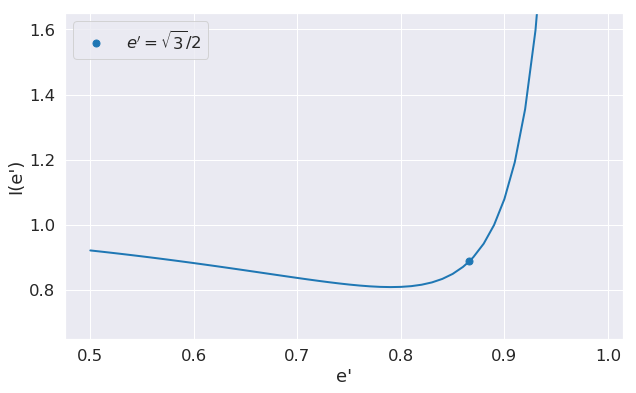

In [6]:
#plot I(e_prime) vs e_prime versus time
x = e_primes
y = I_eps
color = color_seq[0]
sns.set(font_scale=1.5, font='DejaVu Sans')
f, ax = plt.subplots(figsize=(10, 6))
p = ax.plot(x, y, linestyle='-', linewidth=2, color=color, label='')
idx = (e_primes > 0.866) & (e_primes < 0.87)
x = e_primes[idx]
y = I_eps[idx]
print ('x = ', x[0])
print ('y = ', y[0])
p = ax.plot(x, y, linestyle='none', marker='o', color=color, markersize=7, label=r"$e'=\sqrt{3}/2$")
p = ax.set_ylabel("I(e')")
p = ax.set_xlabel("e'")
p = ax.set_ylim(0.65, 1.65)
p = ax.legend()
#plt.savefig('figs/da_nominal.pdf', bbox_inches='tight')